<a href="https://colab.research.google.com/github/KiwiYaya/climate-api-graph/blob/main/GH_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python group project


Thomas

Kiya

Neel

Instructions:

Make sure all files are uploaded to Colab. There should be five plus this one. Then run each of our code sections.

#Thomas

CMSC-206 group project
Thomas's part
12/8/22
All code is original


Question: Have droughts in the US increased in recent decades?
Here's some data which suggests they have...
Source: US Drought Monitor



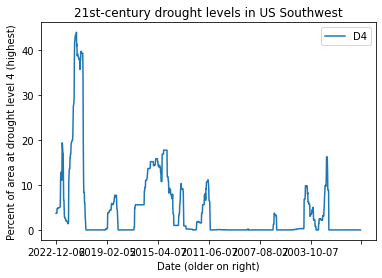

This chart plots the percent of the US Southwest by land area that is
at the highest level of drought measured by US Drought Monitor.

Note the large spike on the left, indicating a major drought in the
last few years.


Press Enter to continue...



Here's some data on the historical levels of Lake Mead, the
reservoir created on the Colorado River by Hoover Dam.
Source: US Bureau of Reclamation


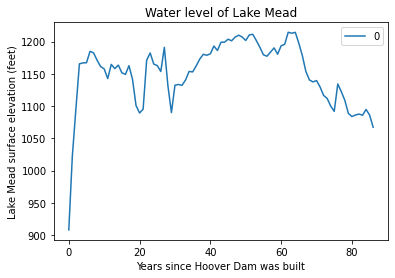

You can see the lake filling up on the left, in the first couple years
after the dam was built in the mid-1930s.

It stays full for most of the 20th century--but notice that the levels
have declined substantially in the last 20 years.


Press Enter to continue...



Question: is this caused by climate change?

Here's a chart of average temperature in the US since 1895.
Source: NOAA


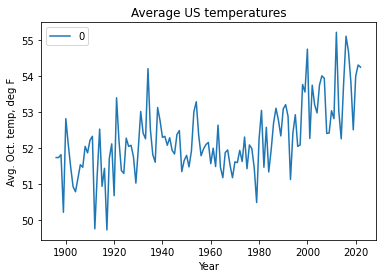

This data clearly shows a rise in average temperatures by a few degrees
over the last century or so.

While it's hard to prove for sure that one causes the other, it's a
reasonable guess that the two phenomena--drought and rising temperatures--are
related.


Press Enter to continue...


Question: So what?

Temperatures are rising and droughts are happening more often, but what
are the actual impacts?




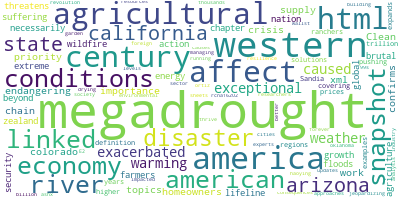


The above is a WordCloud generated from the first few Google search
results for 'economic effects of us southwest drought'(or from the results of
that search downloaded manually, in case Google returns a 429 error.)

Regardless of whether Google worked or not, there are a lot of words
like 'extreme,' 'severe,' 'megadrought', and 'disaster.'

If you look close, you might also notice 'ranchers,' 'supply chain',
'farmers,' 'tribal,' and 'homeowners.' Presumably, some of what and who is
being impacted by the ongoing drought. 


In [ ]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from googlesearch import search
import re
import wordcloud
from IPython.display import Image, display


print("CMSC-206 group project\nThomas's part\n12/8/22\nAll code is original")

sleep(2)

print("\n\nQuestion: Have droughts in the US increased in recent decades?")

sleep(2)

area = 'ClimateHubStatistics'
statistics = 'GetDroughtSeverityStatisticsByAreaPercent'
aoi = '10'
start_date = '12/1/1950'
end_date = '12/31/2022'
statistics_type = '1'

print("Here's some data which suggests they have...")
print("Source: US Drought Monitor\n")

sleep(2)

url = f"https://usdmdataservices.unl.edu/api/{area}/{statistics}?aoi={aoi}&startdate={start_date}&enddate={end_date}&statisticsType={statistics_type}"

df = pd.read_json(requests.get(url).text)

plot = df.plot(x="ValidStart", y="D4", kind="line")
plt.title("21st-century drought levels in US Southwest")
plt.xlabel("Date (older on right)")
plt.ylabel("Percent of area at drought level 4 (highest)")
plt.show()

print("This chart plots the percent of the US Southwest by land area that is\n"
"at the highest level of drought measured by US Drought Monitor.\n")
sleep(2)
print("Note the large spike on the left, indicating a major drought in the\n"
"last few years.\n\n")

input("Press Enter to continue...")

print("\n\n\nHere's some data on the historical levels of Lake Mead, the\nreservoir created on the Colorado River by Hoover Dam.")
print("Source: US Bureau of Reclamation")

sleep(2)
while True:
  try:
    df = pd.read_json('lake_mead.json')
    break
  except:
    print("\nMake sure 'lake_mead.json' is uploaded to Google!\n\n")
    input("Press Enter to try again...")

plot = df.plot()
plt.xlabel("Years since Hoover Dam was built")
plt.ylabel("Lake Mead surface elevation (feet)")
plt.title("Water level of Lake Mead")
plt.show()

sleep(2)

print("You can see the lake filling up on the left, in the first couple years\n"
"after the dam was built in the mid-1930s.\n")
print("It stays full for most of the 20th century--but notice that the levels\n"
"have declined substantially in the last 20 years.\n\n")

input("Press Enter to continue...")

print("\n\n\nQuestion: is this caused by climate change?")

sleep(2)

print("\nHere's a chart of average temperature in the US since 1895.")
print("Source: NOAA")

sleep(2)

while True:
  try:
    df = pd.read_json("1895-2022.json")
    break
  except:
    print("\nMake sure '1895-2022.json' is uploaded to Google!\n\n")
    input("Press Enter to try again...")

dates = list()
vals = list()

for date in df:
  dates.append(int(date/100))
  vals.append(df[date]['value'])

df = pd.DataFrame(vals, dates)

plot = df.plot()
plt.xlabel("Year")
plt.ylabel("Avg. Oct. temp, deg F")
plt.title("Average US temperatures")
plt.show()

sleep(2)

print("This data clearly shows a rise in average temperatures by a few degrees\n"
"over the last century or so.\n")

sleep(2)

print("While it's hard to prove for sure that one causes the other, it's a\n"
"reasonable guess that the two phenomena--drought and rising temperatures--are\n"
"related.\n\n")

sleep(2)

input("Press Enter to continue...")

print("\n\nQuestion: So what?")

sleep(2)

print("\nTemperatures are rising and droughts are happening more often, but what\n"\
"are the actual impacts?\n\n")

impact_words = ""

impact = list()

try:
  for i in search("economic impact of drought in US southwest", tld='co.in', num=100, stop=100, pause=2):
    impact.append(i)
  for i in impact:
    i=re.split("-", i)
    for j in i:
      if 5 < len(j) < 15:
        j.rstrip("/")
        impact_words += " " + j

except: # use standin data if we get a 429 error
  print("\n\nError 429 on Google, using pre-downloaded urls instead...\n\n")
  while True:
    try:
      with open("impact_words.txt") as impact_file:
        for line in impact_file:
          # print(line)
          line=re.split("-", line)
          # print(line)
          for j in line:
            if 5 < len(j) < 15:
              j.rstrip("/")
              impact_words += " " + j
    except:
      print("\nMake sure 'impact_words.txt' is uploaded to Google!\n\n")
      input("Press Enter to try again...")


impact_words = impact_words.replace("/", " ")

wc = wordcloud.WordCloud(background_color="white",
                         stopwords = list(wordcloud.STOPWORDS) + [
                             'https', 'southwest', 'drought', 'economic', 'impact',
                             'gov', 'united states', 'climate', 'pdf', 'org', 'com',
                             'edu', 'U S', 'Southwestern', 'report', 'impacts', "U", "S",
                             "US", "United States", "droughts", "effects",
                             "United", "States", "Image", "result", "change",
                             "year", "will", 'water', 'http', 'Revised3'
                         ]).generate(impact_words)

wc.to_file("wc.png")  # save it first, then display it
display(Image(filename="wc.png")) # stupid, but have to do it this way
# otherwise the notebook waits till the end to actually display the image

sleep(2)

print("\nThe above is a WordCloud generated from the first few Google search\n"
"results for 'economic effects of us southwest drought'(or from the results of\n"
"that search downloaded manually, in case Google returns a 429 error.)")

sleep(2)

print("\nRegardless of whether Google worked or not, there are a lot of words\n"
"like 'extreme,' 'severe,' 'megadrought', and 'disaster.'")

sleep(2)
print("\nIf you look close, you might also notice 'ranchers,' 'supply chain',\n"
"'farmers,' 'tribal,' and 'homeowners.' Presumably, some of what and who is\n"
"being impacted by the ongoing drought. ")



# import json
# import requests
# import pandas as pd
# import matplotlib.pyplot as plt

# area = 'ClimateHubStatistics'
# statistics = 'GetDroughtSeverityStatisticsByAreaPercent'
# aoi = '10'
# start_date = '12/1/1950'
# end_date = '12/31/2022'
# statistics_type = '1'


# print("Drought levels in US Southwest")
# print("Source: US Drought Monitor")

# url = f"https://usdmdataservices.unl.edu/api/{area}/{statistics}?aoi={aoi}&startdate={start_date}&enddate={end_date}&statisticsType={statistics_type}"

# df = pd.read_json(requests.get(url).text)

# # print(df[['ValidStart', 'D0', 'D1', 'D2', 'D3', 'D4']])

# plot = df.plot(x="ValidStart", y="D4", kind="line")
# plt.title("21st-century drought levels in US Southwest:\n"
#           "Note increase right-to-left")
# plt.xlabel("Date")
# plt.ylabel("Percent of area at drought level 4 (highest)")
# plt.show()

# input("Press Enter to continue...")
# # 'MapDate', 'AreaOfInterest', 'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'ValidStart', 'ValidEnd', 'StatisticFormatID'

#Kiya


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I'll compare the weather today to the historical average. What city (in United States) would you like me to compare the weather for? phoenix
33° 34' 20"N, 112° 5' 17"W
The temperature for Phoenix today is 37 degrees Fahrenheit.


Average Highs of US Cities (1991-2020)


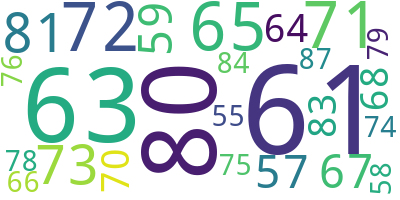

Average Lows of US Cities (1991-2020


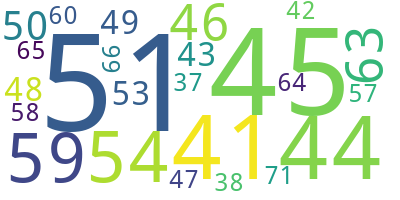


Brr! Consider moving, you Yeti!


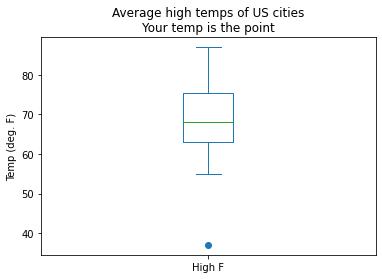

In [ ]:

!pip install wolframalpha

#Kiya's Code
#Weather API call

import json
from urllib.request import urlopen
from pprint import PrettyPrinter
from urllib.request import urlretrieve
import requests
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pickle import STOP
import matplotlib as mpl
from os import path
from PIL import Image
import wolframalpha
import requests
from bs4 import BeautifulSoup
import csv
import google
from IPython.display import Image, display


#https://api.weather.gov/openapi.json
#with urlopen(f"https://api.weather.gov/points/{lat}.0000,{lon}.0000") as response:

#  source = response.read()

#data = json.loads(source)
#data_format = json.dumps(data, indent=2, sort_keys=True)

#Try 'pretty print' from project 6



# while True:
#   try:

chosen_city = input("\n\nI'll compare the weather today to the historical average. What city (in United States) would you like me to compare the weather for? ")
#STEP 1 (Complete): Our goal is to try and get this input to speak sequentially to the Wolfram Alpha AI to generate the longitudinal coordinates
#STEP 2 (Incomplete): Working model in place for Birmingham, Alabama): Then we want to have the coordinates be automatically searched and downloaded from this webpage (https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series)
#STEP 3 (Complete) We then want to pull the historical average temperature from the dataset.
#Step 4 (Complete): Compare the current day's temperature to the average.

client = wolframalpha.Client('5WUHQR-RKAQL6K8JK')

question = "Lat/Lon of " + chosen_city
# question2 = "Weather " + chosen_city

res = client.query(question)
answer = next(res.results).text
print(answer)

# res2 = client.query(question2)
# answer2 = next(res.results).text
# print(answer2)

answer = answer.split("°")

lat = int(answer[0])
lon = int(answer[1].split(" ")[3])

if "S" in answer[1]:
  lat *= -1
if "W" in answer[2]:
  lon *= -1

#NOTE: IN THE FUTURE WE'D LIKE TO DO A WEATHER WEBSITE CALL, BUT WOLFRAM WORKS BETTER WITH OUR CODE FOR NOW

temp=69 # default value, just so the code works if weather.gov gives 503 error

try:
  with urlopen(f"https://api.weather.gov/points/{lat}.0000,{lon}.0000") as response:

    # print(lat, lon)

    source = response.read()

    data = json.loads(source)
    data_format = json.dumps(data, indent=2, sort_keys=True)

    # print(data["properties"]["forecast"])

    forecast = requests.get(data["properties"]["forecast"]).text

    data = json.loads(forecast)

    try:
      temp = data['properties']['periods'][0]['temperature']
    except:
      print("Error! Problem with weather.gov data. Try a different US city.\n")
      print("Using default value for temp.\n\n")

    print(f"The temperature for {chosen_city.title()} today is {temp} degrees Fahrenheit.\n\n")

    # df = pd.read_json(requests.get(url).text)
    # print(forecast)

except:
  print("Error! 503 on api.weather.gov. Problem on server end. Not our fault.\n")
  print("Either that or you entered an invalid city. Make sure it's one in the continental US!\n")
  print("Using default values for mean temps.\n\n")

# break

  # except:
  #   print("Error! City not found!")

#SNARKY WordCloud


while True:
  try:
    df = pd.read_csv("CityTemps.csv")
    break
  except:
    print("Error! Make sure CityTemps.csv is uploaded to Colab!\n\n")
    input("\nPress Enter to continue...")

# print(df['High F'])

# highs = df[['High F']]
# lows = df[['Low F']]

highs = ""

for h in df['High F']:
  highs += f" {h}"

lows = ""

for l in df['Low F']:
  lows += f" {l}"

wc = wordcloud.WordCloud(background_color="white", include_numbers=True).generate(highs)

wc.to_file("highs.png")


wc = wordcloud.WordCloud(background_color="white", include_numbers=True).generate(lows)

wc.to_file("lows.png")  # save it first, then display it

print("Average Highs of US Cities (1991-2020)")
display(Image(filename="highs.png"))

print("Average Lows of US Cities (1991-2020")
display(Image(filename="lows.png"))

#Snarky Message
# print(df['High F'].mean())

nation_high = df['High F'].mean()
nation_low = df['Low F'].mean()

if int(temp) <= nation_high:
  print('\nBrr! Consider moving, you Yeti!')
if int(temp) >= nation_low:
  print("\nSweet, you're warmer than the average person. STAY WHERE YOU ARE!!")


plot = df.plot(y="High F", kind="box")
mpl.pyplot.title("Average high temps of US cities\nYour temp is the point")
# plt.xlabel("Date (older on right)")
mpl.pyplot.ylabel("Temp (deg. F)")
for t in [int(temp)]:
  mpl.pyplot.scatter(y=t, x=1)
mpl.pyplot.show()




#Neel

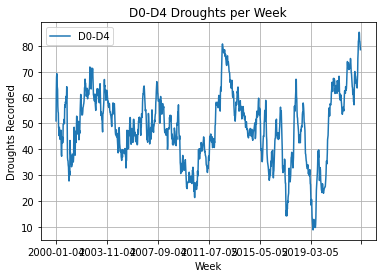

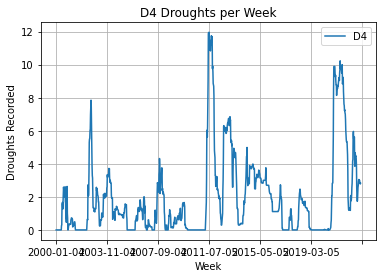

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# drought_data=pd.read_csv('/content/drive/MyDrive/Files_Colab/Data Tables  U.S. Drought Monitor.csv')
drought_data=pd.read_csv('Data Tables U.S. Drought Monitor.csv')
drought_data.iloc[::-1].plot(kind='line',x='Week',y='D0-D4',
                title='D0-D4 Droughts per Week', grid=True, ylabel='Droughts Recorded');
drought_data.iloc[::-1].plot(kind='line',x='Week',y='D4',
                title='D4 Droughts per Week', grid=True, ylabel='Droughts Recorded');